## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_frame=pd.read_csv('C:/Users/prajw/OneDrive/Desktop/Data Science/Projects/ML/credit_risk_dataset.csv')
data_frame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
data_frame.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data_frame.shape

(32581, 12)

## Checking datatype of data

In [5]:
data_frame.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Data Cleaning

In [7]:
# Checking Null Values
data_frame.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Checking outliers for each numerical column

In [8]:
# Function to identify outliers in a pandas dataframe
def outliers(data_frame):
    # Iterate over each numerical column in the dataframe
    for col in data_frame.select_dtypes(include="number"):
        # Calculate the quartiles and interquartile range (IQR) for the column
        q1 = data_frame[col].quantile(0.25)
        q3 = data_frame[col].quantile(0.75)
        iqr = q3 - q1
        # Calculate the lower and upper bounds for the column using the IQR method
        lb = q1 - (1.5 * iqr)
        ub = q3 + (1.5 * iqr)
        # Identify any observations that fall outside the bounds and list them as outliers
        olr = list(data_frame[(data_frame[col] >= ub) | (data_frame[col] <= lb)][col])
        # Print the number of outliers for the column
        print(f"Number of outliers in column '{col}': {len(olr)}")
        
# Example usage of the function with a dataframe 'data' 
outliers(data_frame)

Number of outliers in column 'person_age': 1494
Number of outliers in column 'person_income': 1484
Number of outliers in column 'person_emp_length': 853
Number of outliers in column 'loan_amnt': 1727
Number of outliers in column 'loan_int_rate': 6
Number of outliers in column 'loan_status': 32581
Number of outliers in column 'loan_percent_income': 651
Number of outliers in column 'cb_person_cred_hist_length': 1142


## Filling Null values by mean

In [9]:
data_frame["person_emp_length"] = data_frame["person_emp_length"].fillna(data_frame["person_emp_length"].mean())

In [10]:
data_frame["loan_int_rate"] = data_frame["loan_int_rate"].fillna(data_frame["loan_int_rate"].mean())
data_frame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
data_frame.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Checking duplicates

In [12]:
data_frame.duplicated().sum()

165

In [13]:
data_frame[data_frame.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.990000,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.360000,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.420000,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.900000,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.880000,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.420000,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.880000,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.990000,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.370000,0,0.03,N,16


## Dropping duplicates

In [14]:
data_frame=data_frame.drop_duplicates()
data_frame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Exploratory Data Analysis

## Univariate Analysis

### Analysis on age of person

In [15]:
## Non Visualization Analysis
print("Minimum : ", data_frame['person_age'].min())
print("Maximum : ", data_frame['person_age'].max())
print("Mean : ", data_frame['person_age'].mean())
print("Median : ", data_frame['person_age'].median())
print("Standard Deviation : ", data_frame['person_age'].std())

Minimum :  20
Maximum :  144
Mean :  27.74700765054294
Median :  26.0
Standard Deviation :  6.354099947312116


<AxesSubplot:ylabel='Density'>

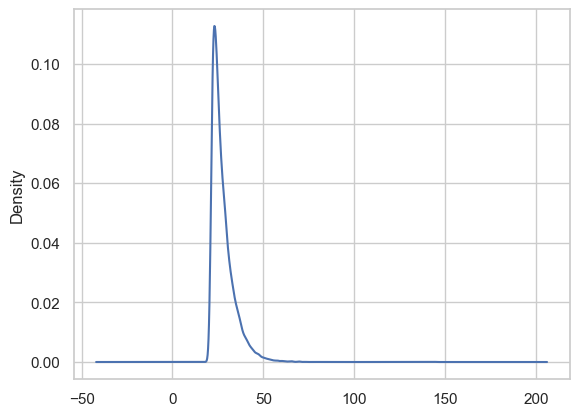

In [16]:
# Distribution Of person_age Feature using kde plot
sns.set(style="whitegrid")
data_frame['person_age'].plot(kind='kde')

<AxesSubplot:>

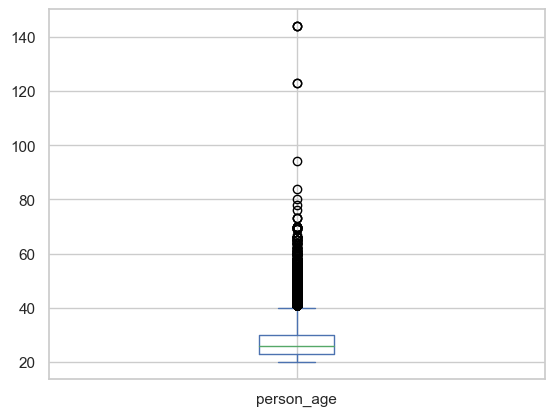

In [17]:
# Detecting the outliers using boxplot
data_frame['person_age'].plot(kind='box')

In [18]:
## Treating Outliers 
q1=data_frame['person_age'].quantile(0.25)
q3=data_frame['person_age'].quantile(0.75)
iqr=q3-q1
print("IQR : ",iqr)
lower_age=np.round(q1-1.5*(iqr))
print("Lower : ",lower_age)
upper_age=np.round(q3+1.5*(iqr))
print("Upper : ",upper_age)

IQR :  7.0
Lower :  12.0
Upper :  40.0


In [19]:
data_frame['person_age'] = data_frame['person_age'].map(lambda age :upper_age if age >=upper_age else lower_age if age<=lower_age else age)

In [20]:
data_frame['person_age'].dtypes

dtype('float64')

In [21]:
data_frame['person_age']=data_frame['person_age'].astype("int")

<AxesSubplot:>

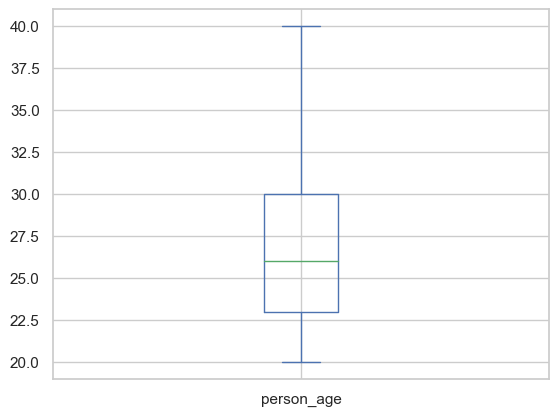

In [22]:
data_frame['person_age'].plot(kind='box')

In [23]:
data_frame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Analysis on person_income

In [24]:
## Non Visualization Analysis
print("Minimum : ",data_frame['person_income'].min())
print("Maximum : ",data_frame['person_income'].max())
print("Mean : ",data_frame['person_income'].mean())
print("Median : ",data_frame['person_income'].median())
print("Standard Deviation : ",data_frame['person_income'].std())

Minimum :  4000
Maximum :  6000000
Mean :  66091.64082551826
Median :  55000.0
Standard Deviation :  62015.58026889586


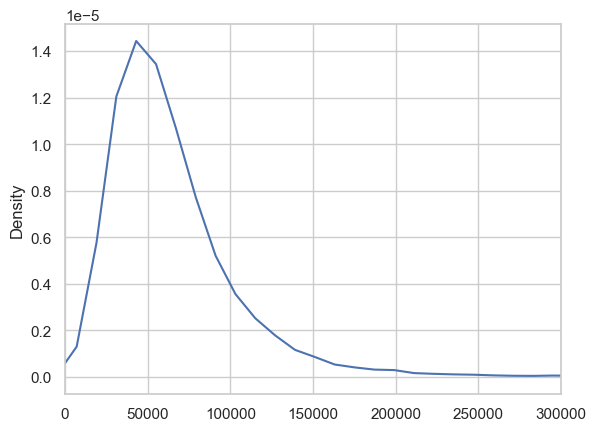

In [25]:
data_frame['person_income'].plot(kind='density')
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.xlim(0,300000)
plt.show()

<AxesSubplot:>

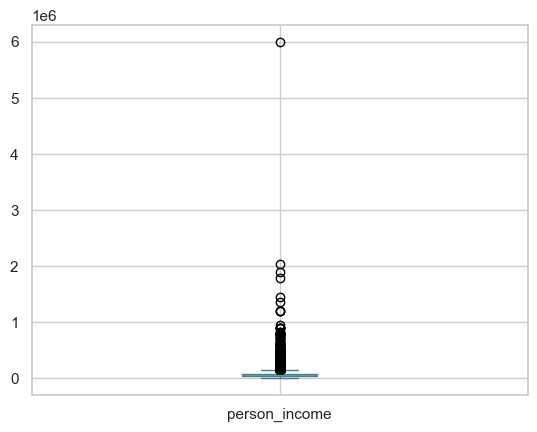

In [26]:
data_frame['person_income'].plot(kind='box')

In [27]:
q1=data_frame['person_income'].quantile(0.25)
q3=data_frame['person_income'].quantile(0.75)
iqr=q3-q1

print('IQR: ',iqr)
lower_income=np.round(q1-1.5*(iqr))
print("Lower : ",lower_income)
upper_income=np.round(q3+1.5*(iqr))
print("Upper : ",upper_income)

IQR:  40676.0
Lower :  -22472.0
Upper :  140232.0


In [28]:
data_frame['person_income'] = data_frame['person_income'].map(lambda income :upper_income if income >=upper_income else lower_income if income<=lower_income else income)

<AxesSubplot:>

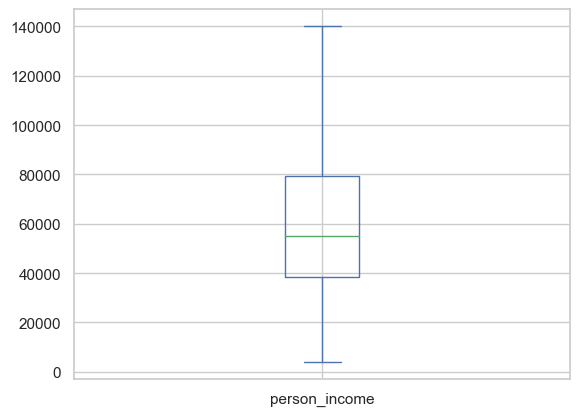

In [29]:
data_frame['person_income'].plot(kind='box')

In [30]:
data_frame

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Analysis on person_emp_length

In [31]:
## Non Visualization Analysis
print("Minimum : ",data_frame['person_emp_length'].min())
print("Maximum : ",data_frame['person_emp_length'].max())
print("Mean : ",data_frame['person_emp_length'].mean())
print("Median : ",data_frame['person_emp_length'].median())
print("Standard Deviation : ",data_frame['person_emp_length'].std())

Minimum :  0.0
Maximum :  123.0
Mean :  4.790487775951696
Median :  4.0
Standard Deviation :  4.088377831797549


<AxesSubplot:ylabel='Density'>

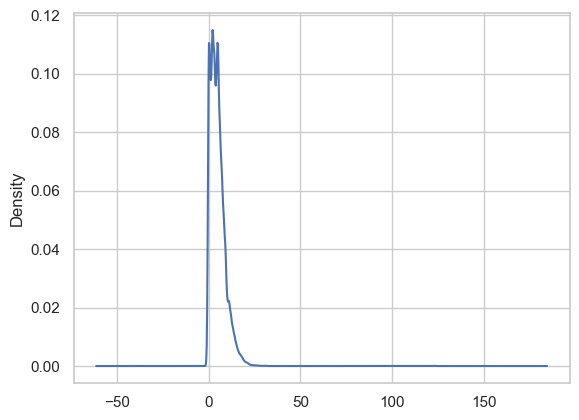

In [32]:
data_frame['person_emp_length'].plot(kind='kde')

<AxesSubplot:>

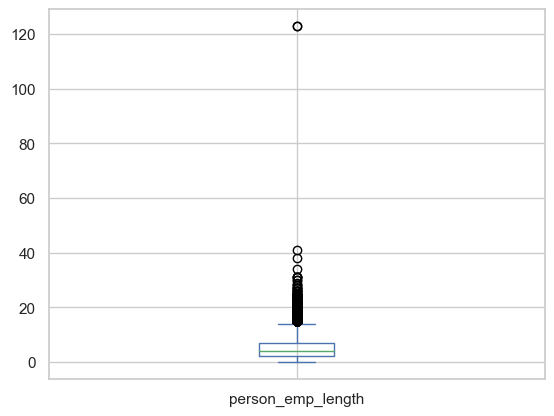

In [33]:
data_frame['person_emp_length'].plot(kind='box')

In [34]:
q1=data_frame['person_emp_length'].quantile(0.25)
q3=data_frame['person_emp_length'].quantile(0.75)
iqr=q3-q1
print('IQR: ', iqr)
lower_emp=np.round(q1-1.5*(iqr))
print('Lower: ', lower_emp)
upper_emp=np.round(q3+1.5*(iqr))
print('Upper: ', upper_emp)

IQR:  5.0
Lower:  -6.0
Upper:  14.0


In [35]:
data_frame[(data_frame['person_emp_length']>lower_emp) & (data_frame['person_emp_length']<upper_emp)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [36]:
data_frame['person_emp_length']=data_frame['person_emp_length'].map(lambda emp_length: upper_emp if emp_length >= upper_emp else lower_emp if emp_length<=lower_emp else emp_length)

<AxesSubplot:>

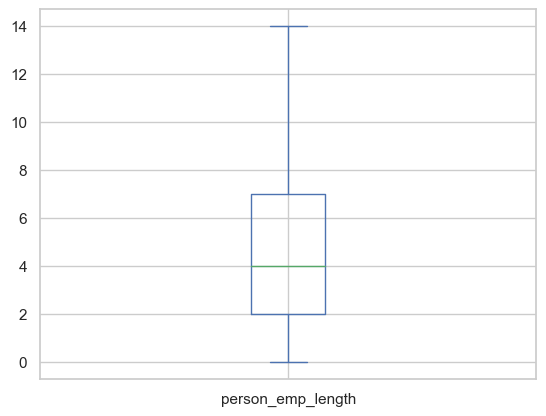

In [37]:
data_frame['person_emp_length'].plot(kind='box')

### Analysis on loan_amount

In [38]:
## Non Visualization Analysis
print("Minimum : ",data_frame['loan_amnt'].min())
print("Maximum : ",data_frame['loan_amnt'].max())
print("Mean : ",data_frame['loan_amnt'].mean())
print("Median : ",data_frame['loan_amnt'].median())
print("Standard Deviation : ",data_frame['loan_amnt'].std())

Minimum :  500
Maximum :  35000
Mean :  9593.845631786771
Median :  8000.0
Standard Deviation :  6322.7302408617625


<AxesSubplot:ylabel='Density'>

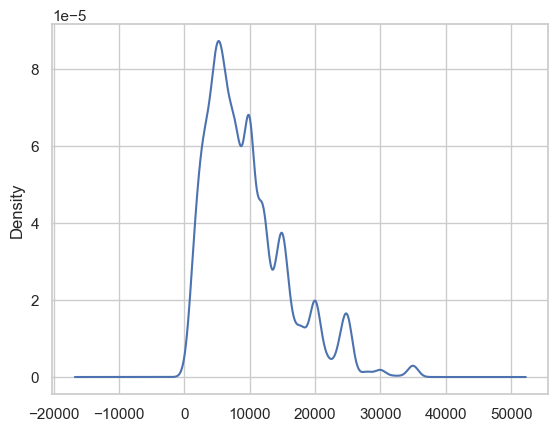

In [39]:
data_frame['loan_amnt'].plot(kind='kde')

<AxesSubplot:>

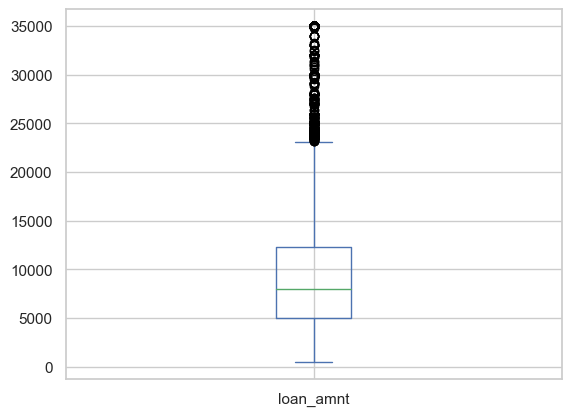

In [40]:
data_frame['loan_amnt'].plot(kind='box')

In [41]:
q1=data_frame['loan_amnt'].quantile(0.25)
q3=data_frame['loan_amnt'].quantile(0.75)
iqr=q3-q1
print('IQR: ', iqr)
lower_amnt=np.round(q1-1.5*(iqr))
print('Lower: ', lower_amnt)
upper_amnt=np.round(q3+1.5*(iqr))
print('Upper: ', upper_amnt)

IQR:  7250.0
Lower:  -5875.0
Upper:  23125.0


In [42]:
data_frame[(data_frame['loan_amnt']>lower_amnt) & (data_frame['loan_amnt']<upper_amnt)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000.0,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
11,21,10000.0,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,40,64500.0,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [43]:
data_frame['loan_amnt']=data_frame['loan_amnt'].map(lambda amount: upper_amnt if amount>=upper_amnt else lower_amnt if amount<=lower_amnt else amount)

<AxesSubplot:>

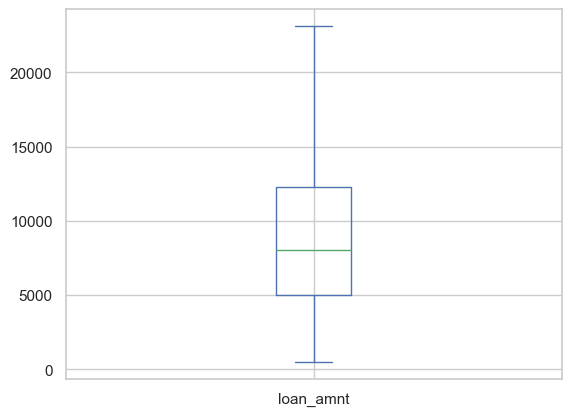

In [44]:
data_frame['loan_amnt'].plot(kind='box')

### Analysis on loan_int_rate

In [45]:
## Non Visualization Analysis
print("Minimum : ",data_frame['loan_int_rate'].min())
print("Maximum : ",data_frame['loan_int_rate'].max())
print("Mean : ",data_frame['loan_int_rate'].mean())
print("Median : ",data_frame['loan_int_rate'].median())
print("Standard Deviation : ",data_frame['loan_int_rate'].std())

Minimum :  5.42
Maximum :  23.22
Mean :  11.016733270344664
Median :  11.01169489224439
Standard Deviation :  3.0830404884414917


<AxesSubplot:ylabel='Density'>

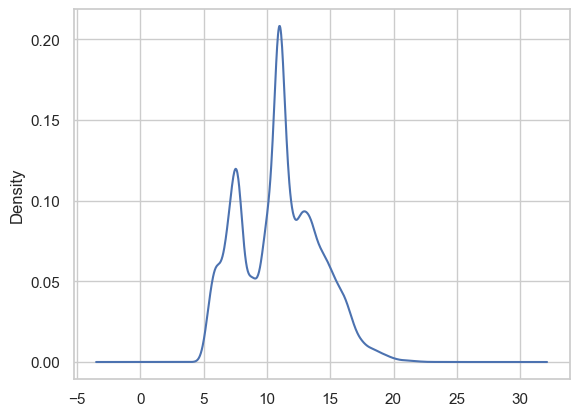

In [46]:
data_frame['loan_int_rate'].plot(kind='kde')

<AxesSubplot:>

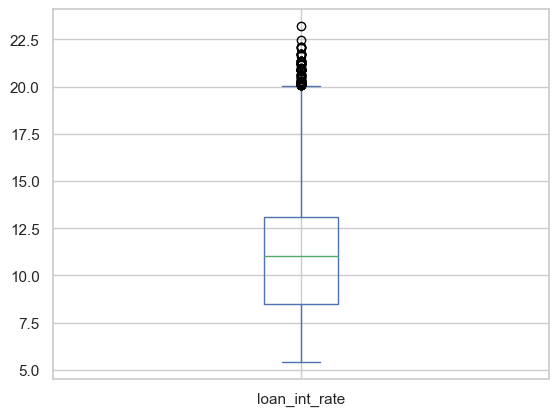

In [47]:
data_frame['loan_int_rate'].plot(kind='box')

In [48]:
q1=data_frame['loan_int_rate'].quantile(0.25)
q3=data_frame['loan_int_rate'].quantile(0.75)
iqr=q3-q1
print('IQR: ', iqr)
lower_rate=(q1-1.5*(iqr))
print('Lower: ', lower_rate)
upper_rate=(q3+1.5*(iqr))
print('Upper: ', upper_rate)

IQR:  4.619999999999999
Lower:  1.5600000000000014
Upper:  20.04


In [49]:
data_frame[(data_frame['loan_int_rate']>lower_rate) & (data_frame['loan_int_rate']<upper_rate)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.0,PERSONAL,D,23125.0,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,30
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,19
32578,40,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23125.0,10.99,1,0.46,N,28
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,26


In [50]:
data_frame['loan_int_rate']=data_frame['loan_int_rate'].map(lambda rate: upper_rate if rate>=upper_rate else lower_rate if rate<=lower_rate else rate)

<AxesSubplot:>

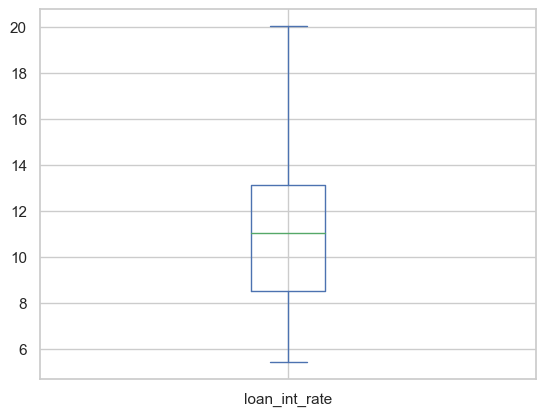

In [51]:
data_frame['loan_int_rate'].plot(kind='box')

### Analysis on cb_person_cred_hist_length

In [52]:
## Non Visualization Analysis
print("Minimum : ",data_frame['cb_person_cred_hist_length'].min())
print("Maximum : ",data_frame['cb_person_cred_hist_length'].max())
print("Mean : ",data_frame['cb_person_cred_hist_length'].mean())
print("Median : ",data_frame['cb_person_cred_hist_length'].median())
print("Standard Deviation : ",data_frame['cb_person_cred_hist_length'].std())

Minimum :  2
Maximum :  30
Mean :  5.811296890424482
Median :  4.0
Standard Deviation :  4.059030349939405


<AxesSubplot:ylabel='Density'>

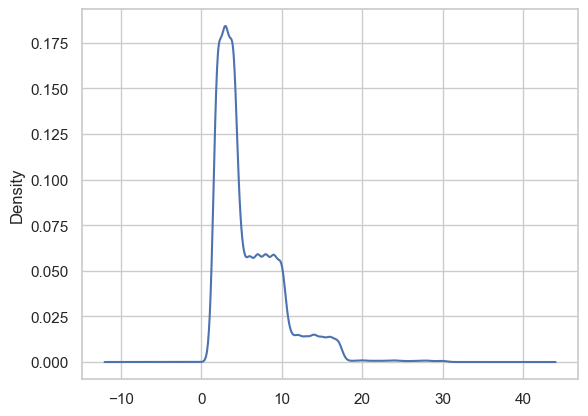

In [53]:
data_frame['cb_person_cred_hist_length'].plot(kind='kde')

<AxesSubplot:>

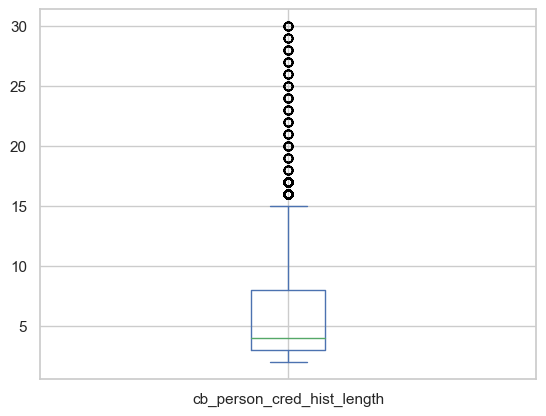

In [54]:
data_frame['cb_person_cred_hist_length'].plot(kind='box')

In [55]:
q1=data_frame['cb_person_cred_hist_length'].quantile(0.25)
q3=data_frame['cb_person_cred_hist_length'].quantile(0.75)
iqr=q3-q1
print('IQR: ', iqr)
lower_hist=(q1-1.5*(iqr))
print('Lower: ', lower_hist)
upper_hist=(q3+1.5*(iqr))
print('Upper: ', upper_hist)

IQR:  5.0
Lower:  -4.5
Upper:  15.5


In [56]:
data_frame[(data_frame['cb_person_cred_hist_length']>lower_hist) & (data_frame['cb_person_cred_hist_length']<upper_hist)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,14.0,PERSONAL,D,23125.0,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000.0,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000.0,6.62,0,0.04,N,15
32292,38,140232.0,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000.0,7.68,0,0.01,N,12
32293,38,110000.0,MORTGAGE,5.0,MEDICAL,B,16000.0,11.99,0,0.15,N,13
32294,36,92000.0,MORTGAGE,14.0,DEBTCONSOLIDATION,A,4000.0,7.29,0,0.04,N,13


In [57]:
data_frame['cb_person_cred_hist_length']=data_frame['cb_person_cred_hist_length'].map(lambda hist_length: upper_hist if hist_length>=upper_hist else lower_hist if hist_length<=lower_hist else hist_length)

<AxesSubplot:>

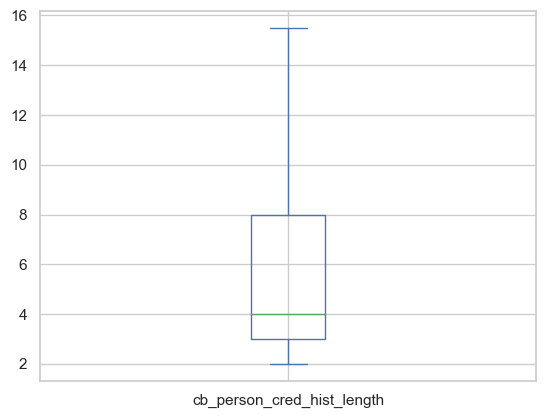

In [58]:
data_frame['cb_person_cred_hist_length'].plot(kind='box')

### Analysis on loan_percent_income

In [59]:
#Non_Visualization analysis
print("Minimum : ",data_frame['loan_percent_income'].min())
print("Maxmum : ",data_frame['loan_percent_income'].max())
print("Mean : ", data_frame['loan_percent_income'].mean())
print("Median : ",data_frame['loan_percent_income'].median())
print("Standard Deviation : ", data_frame['loan_percent_income'].std())

Minimum :  0.0
Maxmum :  0.83
Mean :  0.17024987660415125
Median :  0.15
Standard Deviation :  0.10681197337092144


<AxesSubplot:ylabel='Density'>

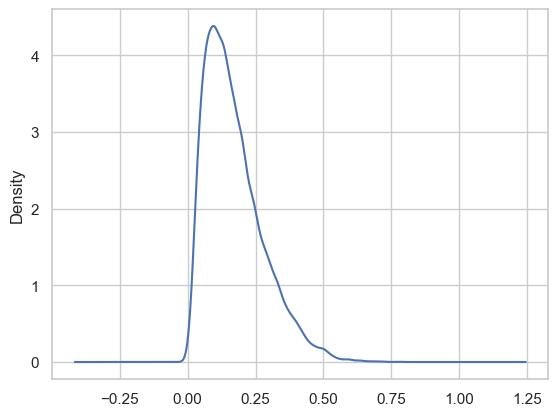

In [60]:
# Distribution Of loan_percent_income Feature using kde plot
data_frame['loan_percent_income'].plot(kind='kde')

<AxesSubplot:>

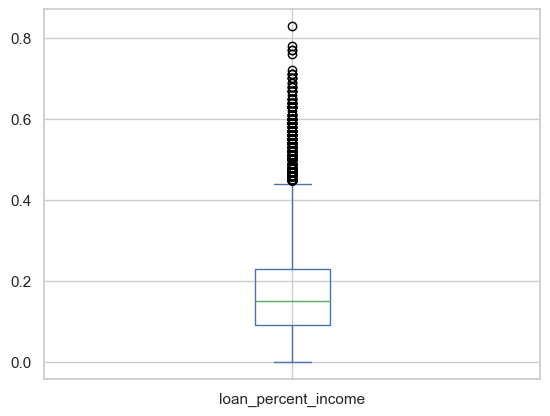

In [61]:
# checking the outliers using boxplot..
data_frame['loan_percent_income'].plot(kind='box')

In [62]:
q1=data_frame["loan_percent_income"].quantile(0.25)
q3=data_frame["loan_percent_income"].quantile(0.75)

iqr=q3-q1
print("iqr:",iqr)

lower_per=q1-(1.5*iqr)
upper_per=q3+(1.5*iqr)

print("lower_per",lower_per)
print("upper_per",upper_per)

iqr: 0.14
lower_per -0.12000000000000002
upper_per 0.44000000000000006


In [63]:
data_frame[(data_frame['loan_percent_income']>lower_per) & (data_frame['loan_percent_income']<upper_per)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0
5,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,0.25,N,2.0
7,24,78956.0,RENT,5.0,MEDICAL,B,23125.0,11.11,1,0.44,N,4.0
8,24,83000.0,RENT,8.0,PERSONAL,A,23125.0,8.90,1,0.42,N,2.0
9,21,10000.0,OWN,6.0,VENTURE,D,1600.0,14.74,1,0.16,N,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,40,64500.0,RENT,0.0,EDUCATION,B,5000.0,11.26,0,0.08,N,15.5
32576,40,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5
32577,40,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5
32579,40,140232.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5


In [64]:
data_frame['loan_percent_income'] = data_frame['loan_percent_income'].map(lambda loan :upper_per if loan >=upper_per else lower_per if loan<=lower_per else loan)

<AxesSubplot:>

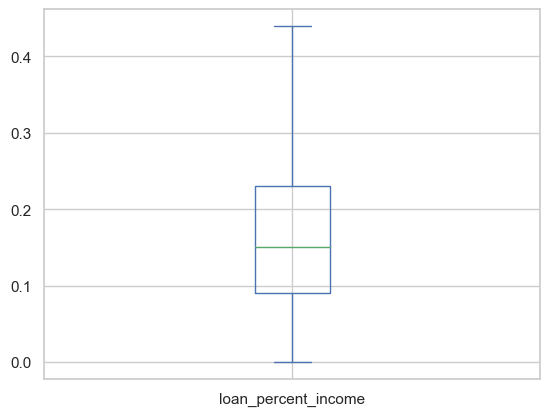

In [65]:
# checking the outliers using boxplot After Treatment..
data_frame['loan_percent_income'].plot(kind='box')

### Analysis on person_home_ownership

In [66]:
data_frame['person_home_ownership'].value_counts()

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [67]:
## getting value_counts() by normalization
data_frame["person_home_ownership"].value_counts(normalize= True)

RENT        0.505244
MORTGAGE    0.412420
OWN         0.079066
OTHER       0.003270
Name: person_home_ownership, dtype: float64

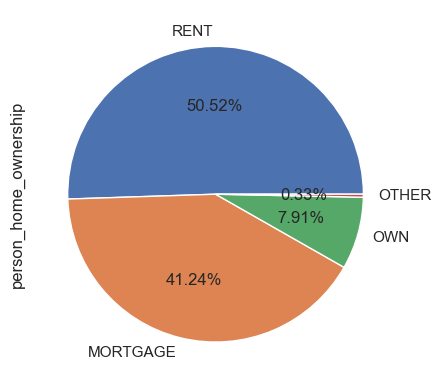

In [68]:
data_frame['person_home_ownership'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()


### Analysis on loan_intent

In [69]:
# Assuming data_frame contains your DataFrame with 'loan_intent' column
value_counts = data_frame['loan_intent'].value_counts()

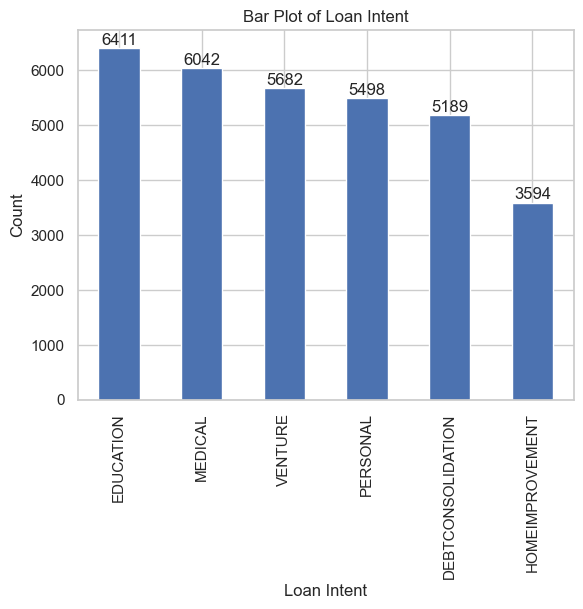

In [70]:
# Create a bar plot
ax = value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Bar Plot of Loan Intent')

# Annotate the bars with their values
for i, value in enumerate(value_counts):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

### Analysis on loan_grade

In [71]:
# Assuming data_frame contains your DataFrame with 'loan_grade' column
value_counts = data_frame['loan_grade'].value_counts()
value_counts

A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

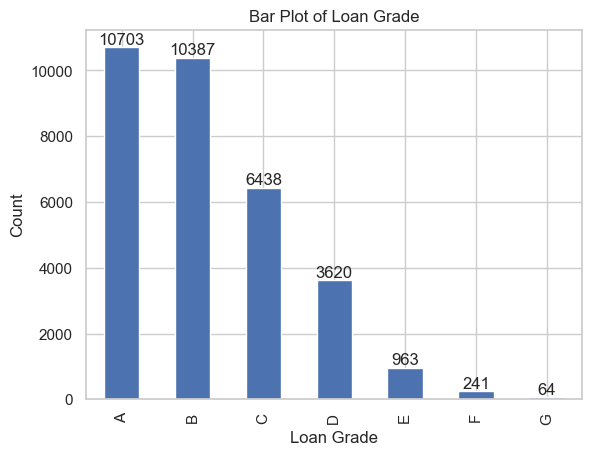

In [72]:
# Create a bar plot
ax = value_counts.plot(kind='bar')

# Add labels and a title
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Bar Plot of Loan Grade')

# Annotate the bars with their values
for i, value in enumerate(value_counts):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

### Analysis on cb_person_default_on_file

In [73]:
data_frame['cb_person_default_on_file'].value_counts(normalize= True)*100

N    82.323544
Y    17.676456
Name: cb_person_default_on_file, dtype: float64

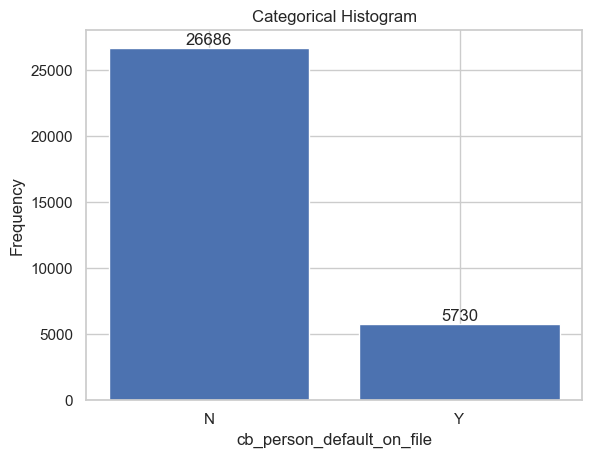

In [74]:
# Assuming data_frame contains your DataFrame with 'cb_person_default_on_file' column
category_counts = data_frame['cb_person_default_on_file'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('cb_person_default_on_file')
plt.ylabel('Frequency')
plt.title('Categorical Histogram')

# Annotate the bars with their values
for i, value in enumerate(category_counts):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

## Bi-variate Analysis


#### Numerical vs Numerical

### Analysis on person's age and persons income

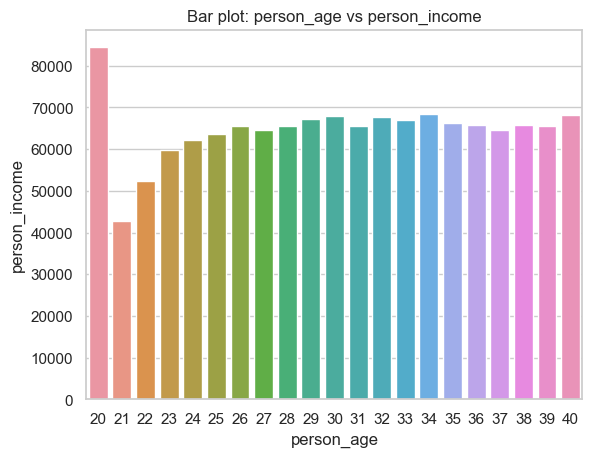

In [75]:
sns.barplot(x=data_frame['person_age'], y=data_frame['person_income'], data=data_frame,ci=None) # ci -> confidence interval
plt.title('Bar plot: person_age vs person_income')
plt.xlabel('person_age')
plt.ylabel('person_income')
plt.show()

### Analysis on person's age and loan status

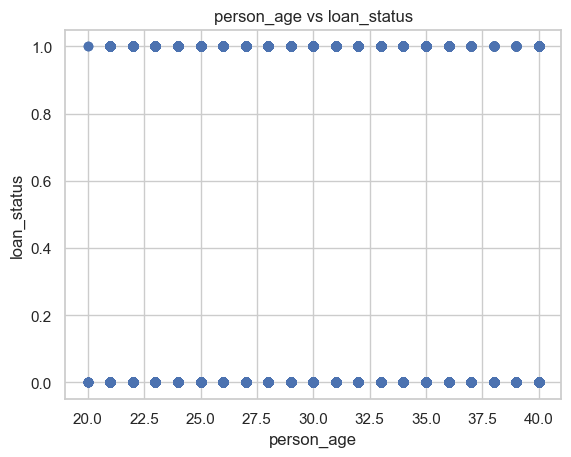

In [76]:
plt.scatter(x = data_frame['person_age'],y = data_frame['loan_status'])
plt.title("person_age vs loan_status")
plt.xlabel("person_age")
plt.ylabel("loan_status")
plt.show()

### Analysis on person's income and loan status

(0.0, 500000.0)

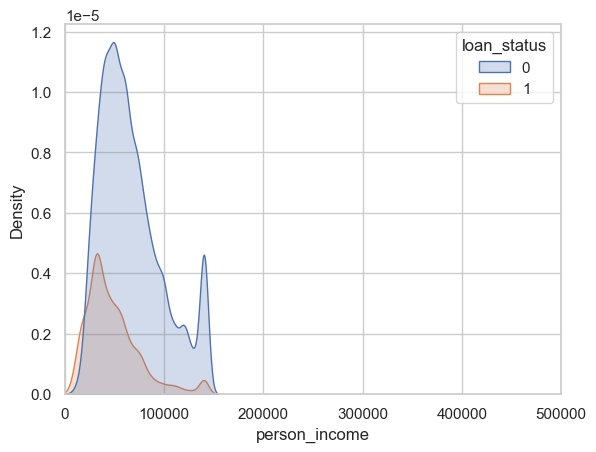

In [77]:
sns.kdeplot(data=data_frame, x="person_income", hue="loan_status", fill=True)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.xlim(0,500000)

### Analysis on Person_income and loan_percent_income

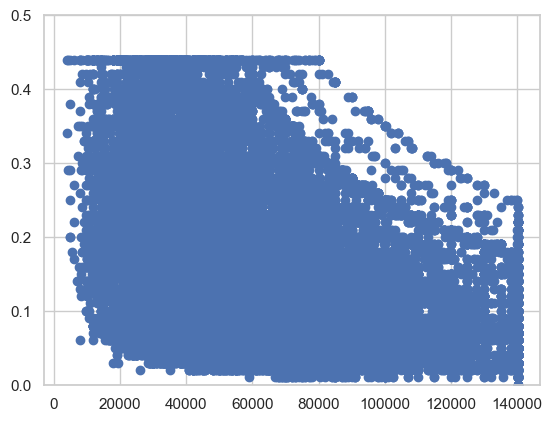

In [78]:
plt.scatter(x = data_frame['person_income'],y = data_frame['loan_percent_income'])
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.ylim(0,0.5)
plt.show()

### Analysis on person's income and loan amount

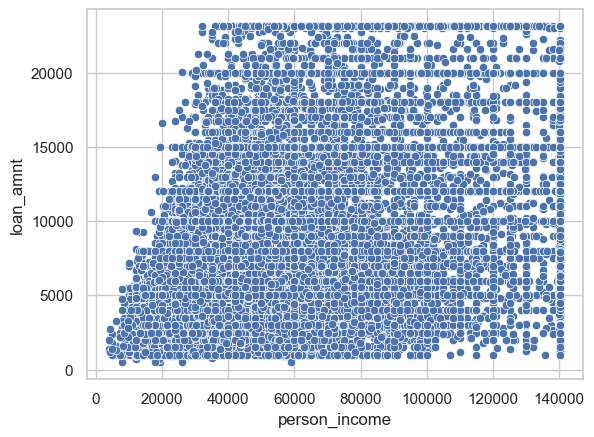

In [79]:
sns.scatterplot(x=data_frame['person_income'],y=data_frame['loan_amnt'],data=data_frame)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

### Analysis on loan_amnt and loan_status

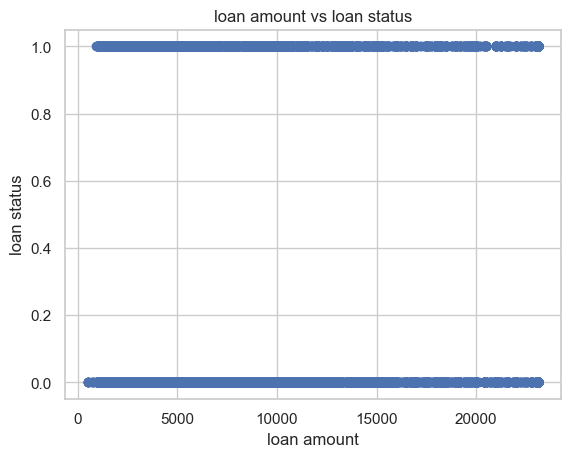

In [80]:
plt.scatter(x = data_frame['loan_amnt'],y = data_frame['loan_status'])
plt.title("loan amount vs loan status")
plt.xlabel("loan amount")
plt.ylabel("loan status")
plt.show()

In [81]:
data_frame[['loan_amnt','person_age']].max()

loan_amnt     23125.0
person_age       40.0
dtype: float64

## Analysis on person_age and person_emp_length

<AxesSubplot:xlabel='person_emp_length', ylabel='person_age'>

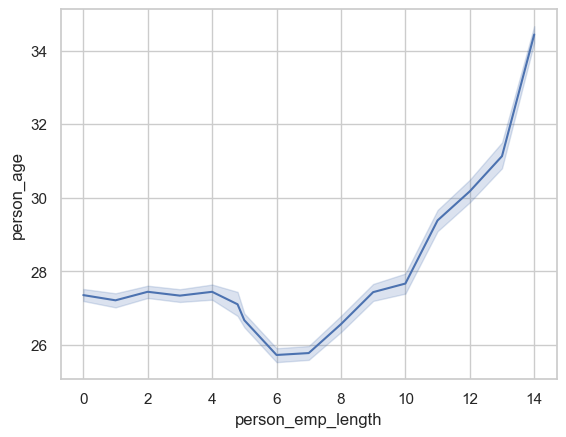

In [82]:
sns.lineplot(data=data_frame, x=data_frame['person_emp_length'], y=data_frame['person_age'])

In [83]:
data_frame[['person_emp_length','person_age']].max()

person_emp_length    14.0
person_age           40.0
dtype: float64

### Analysis_on relationship between the cb_person_cred_hist_length and laon_status

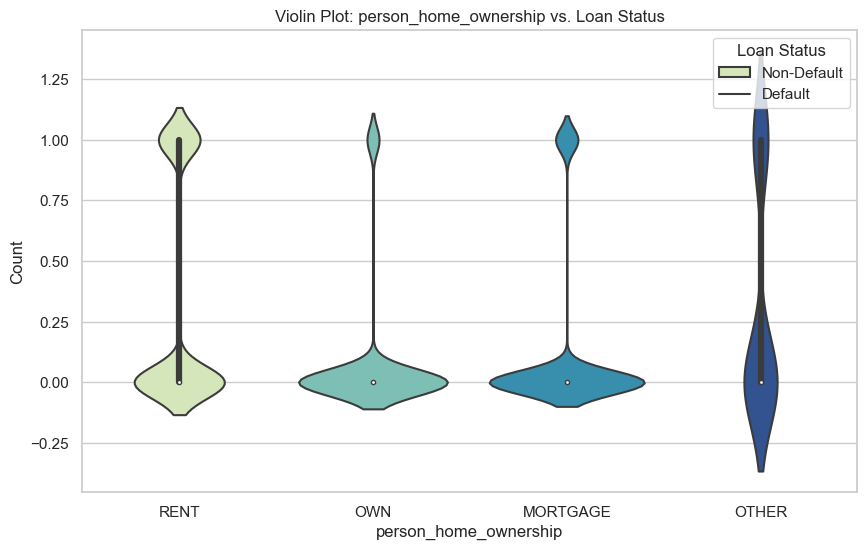

In [84]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_frame, x='person_home_ownership', y='loan_status',palette='YlGnBu')
plt.xlabel('person_home_ownership')
plt.ylabel('Count')
plt.title('Violin Plot: person_home_ownership vs. Loan Status')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.show()

### Analysis_on relationship between the loan_int_rate and loan_status

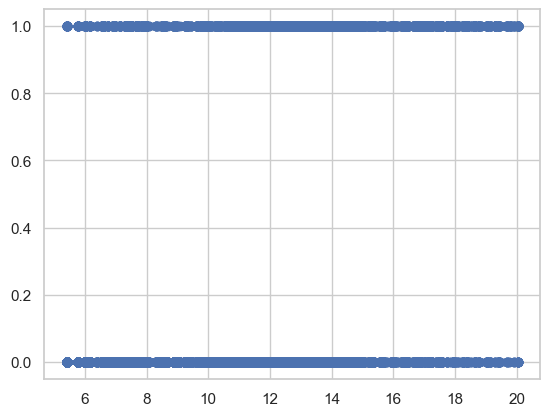

In [85]:
plt.scatter(x = data_frame['loan_int_rate'],y = data_frame['loan_status'])
plt.show()

### Categorical vs Numerical

### Analysis_on relationship between the person_home_ownership and loan_amnt

<AxesSubplot:xlabel='person_home_ownership', ylabel='loan_amnt'>

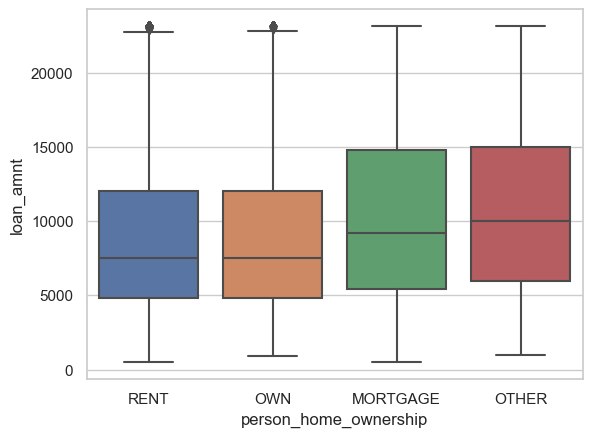

In [86]:
sns.boxplot(data=data_frame,x="person_home_ownership",y="loan_amnt")

### Analysis on relationship between the loan_intent and loan_status

<AxesSubplot:xlabel='loan_intent', ylabel='loan_status'>

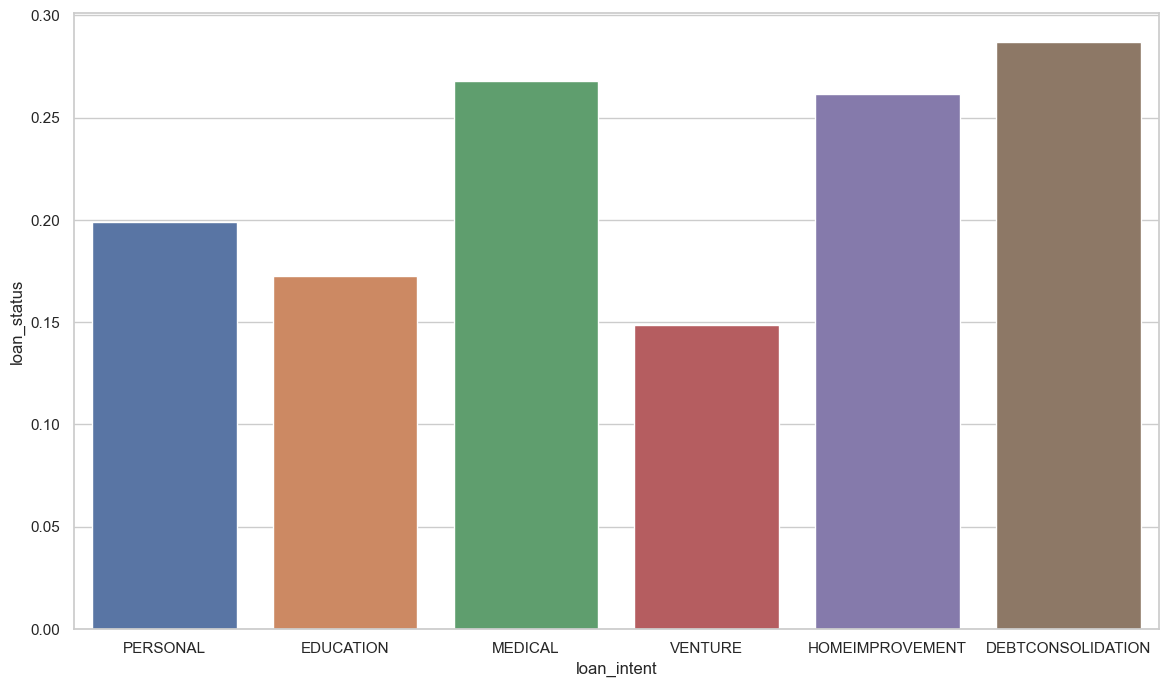

In [87]:
plt.figure(figsize=(14,8))
sns.barplot(data=data_frame, x=data_frame['loan_intent'], y=data_frame['loan_status'], ci=None)

### Analysis on relationship B/w loan_grade and Loan_status

<AxesSubplot:xlabel='loan_status'>

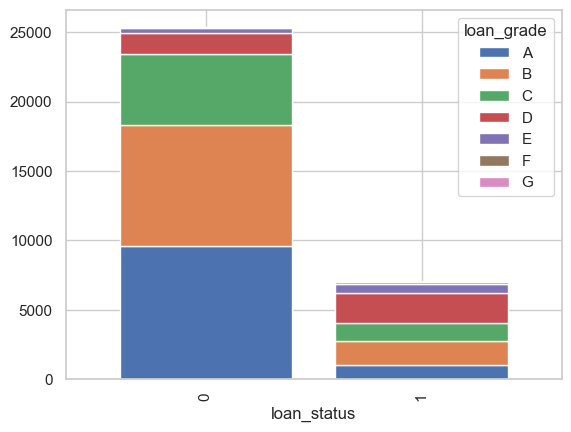

In [88]:
pd.crosstab(data_frame["loan_status"],data_frame["loan_grade"]).plot(kind="bar",width=0.8,stacked=True)

### Analysis on the relationship b/w laon_status and person_home_owenrship

<AxesSubplot:xlabel='loan_status'>

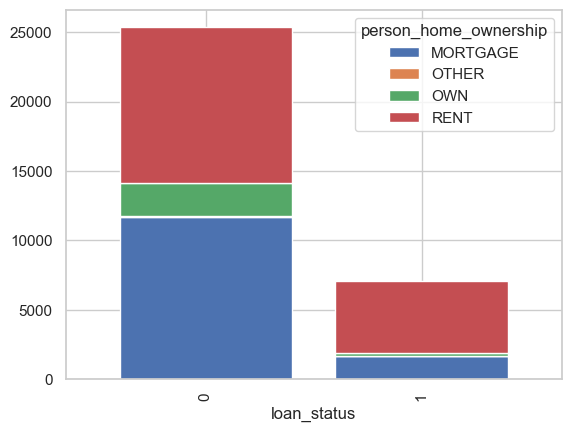

In [89]:
pd.crosstab(data_frame["loan_status"],data_frame["person_home_ownership"]).plot(kind="bar",width=0.8,stacked=True)

### Analysis on relationship between the loan_intent and Loan_status¶


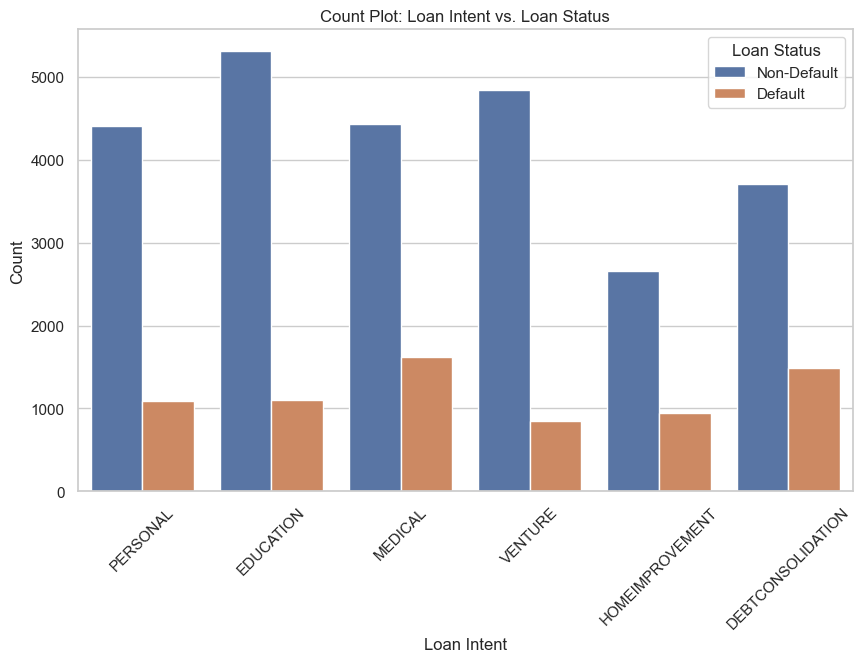

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='loan_intent', hue='loan_status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Count Plot: Loan Intent vs. Loan Status')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()

### Analysis the relatioship Between the cb_person_default and loan_status

<AxesSubplot:xlabel='loan_status'>

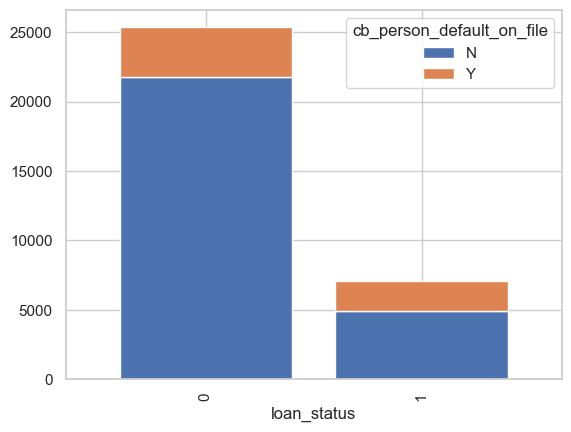

In [91]:
pd.crosstab(data_frame["loan_status"],data_frame["cb_person_default_on_file"]).plot(kind="bar",width=0.8,stacked=True)

### Multivariate Analysis

<AxesSubplot:>

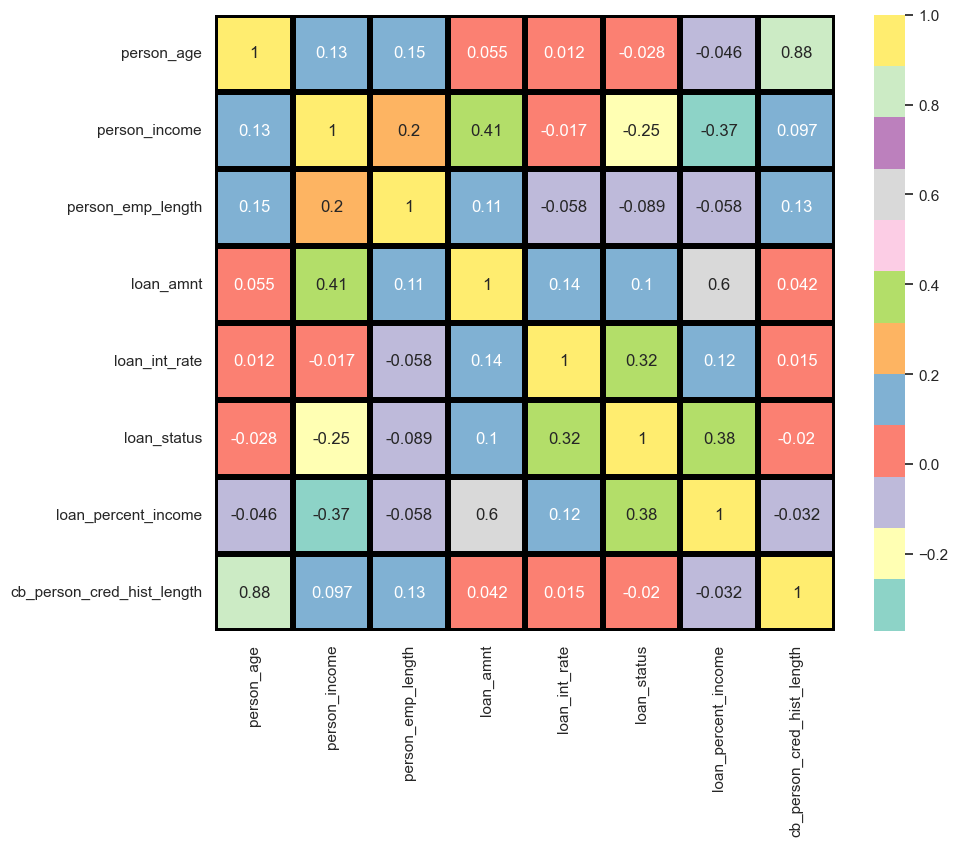

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(data_frame.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)

## Data preparation and Model buliding

## Identify the Target Variable and Splitting the Data into Train and Test

In [93]:
X = data_frame[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [94]:
Y = data_frame["loan_status"]

In [95]:
from sklearn.model_selection import train_test_split

# train_test_split => shuffles the data first, then it will split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , train_size = 0.75, random_state=42)

In [96]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(24312, 11) (24312,)
(8104, 11) (8104,)


## Separating Categorical and Numerical Columns

In [97]:
X_train.dtypes

person_age                      int32
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object

In [98]:
# Filtering all categorical type data
X_train_cat = X_train.select_dtypes(include=['object'])

In [99]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
27424,OWN,EDUCATION,B,N
4191,MORTGAGE,DEBTCONSOLIDATION,B,N
10768,RENT,EDUCATION,A,N
27220,MORTGAGE,VENTURE,D,Y
10250,MORTGAGE,PERSONAL,B,N


In [100]:
# Filtering all Numerical type data
X_train_num = X_train.select_dtypes(exclude=['object'])

In [101]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
27424,33,21000.0,1.0,7750.0,11.83,0.37,6.0
4191,24,40000.0,6.0,5000.0,11.11,0.13,2.0
10768,22,40000.0,2.0,10000.0,7.14,0.25,4.0
27220,30,126132.0,1.0,14400.0,14.54,0.11,7.0
10250,23,66000.0,7.0,10000.0,9.63,0.15,4.0


## Scaling the Numerical Features

In [102]:
### For Numerical Variables - Standardization  (Fit and Transform)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

In [103]:
X_train_cat_o = X_train_cat [['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [104]:
X_train_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
27424,OWN,EDUCATION,N
4191,MORTGAGE,DEBTCONSOLIDATION,N
10768,RENT,EDUCATION,N
27220,MORTGAGE,VENTURE,Y
10250,MORTGAGE,PERSONAL,N


In [105]:
X_train_cat_l = X_train_cat[['loan_grade']]

In [106]:
X_train_cat_l

,loan_grade
27424,B
4191,B
10768,A
27220,D
10250,B
...,...
29961,C
5390,A
860,E
15795,C


## Applying one hot Encoding on Categorical Columns

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
encoder = OneHotEncoder(drop = "first",sparse = False)

In [109]:
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_o),
                               columns=encoder.get_feature_names_out(X_train_cat_o.columns),
                               index = X_train_cat_o.index)

In [110]:
X_train_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
27424,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10768,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
27220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29961,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Label Encoding on Categorical Columns

In [111]:
X_train_cat_l = X_train_cat["loan_grade"]

In [112]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_l.index)

X_train_cat_le.head()

""
27424
4191
10768
27220
10250


In [113]:
X_train_cat_l.unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [114]:
grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}

In [115]:
X_train_cat_le['loan_grade'] = X_train_cat_l.apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

,loan_grade
27424,6
4191,6
10768,7
27220,4
10250,6


##  Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [116]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe, X_train_cat_le], axis=1)

In [117]:
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
27424,1.070757,-1.302019,-1.002005,-0.285646,0.262880,1.952748,0.078460,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
4191,-0.656919,-0.703156,0.363236,-0.757786,0.027867,-0.382998,-1.000765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
10768,-1.040847,-0.703156,-0.728957,0.100650,-1.267971,0.784875,-0.461152,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
27220,0.494865,2.011647,-1.002005,0.856074,1.147445,-0.577644,0.348267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
10250,-0.848883,0.116340,0.636285,0.100650,-0.455216,-0.188353,-0.461152,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6


## Preparing Test Data

In [118]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
20562,31,100000.0,RENT,2.0,VENTURE,A,10000.0,8.49,0.10,N,5.0
1090,21,37232.0,RENT,3.0,MEDICAL,B,17500.0,12.53,0.44,N,2.0
4762,22,31000.0,RENT,2.0,MEDICAL,B,5000.0,10.62,0.16,N,4.0
12381,22,40000.0,RENT,2.0,DEBTCONSOLIDATION,B,12000.0,10.99,0.30,N,2.0
15112,23,122000.0,MORTGAGE,5.0,PERSONAL,A,12000.0,7.29,0.10,N,3.0


## Separating Numerical and Categorical Columns

In [119]:
X_test_num = X_test.select_dtypes(exclude=['object'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20562,31,100000.0,2.0,10000.0,8.49,0.10,5.0
1090,21,37232.0,3.0,17500.0,12.53,0.44,2.0
4762,22,31000.0,2.0,5000.0,10.62,0.16,4.0
12381,22,40000.0,2.0,12000.0,10.99,0.30,2.0
15112,23,122000.0,5.0,12000.0,7.29,0.10,3.0


In [120]:
X_test_cat = X_test.select_dtypes(['object'])
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
20562,RENT,VENTURE,A,N
1090,RENT,MEDICAL,B,N
4762,RENT,MEDICAL,B,N
12381,RENT,DEBTCONSOLIDATION,B,N
15112,MORTGAGE,PERSONAL,A,N


## Scaling the Numerical Features

In [121]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20562,0.686829,1.187990,-0.728957,0.100650,-0.827320,-0.674966,-0.191346
1090,-1.232811,-0.790401,-0.455909,1.388304,0.491366,2.634007,-1.000765
4762,-1.040847,-0.986828,-0.728957,-0.757786,-0.132073,-0.091030,-0.461152
12381,-1.040847,-0.703156,-0.728957,0.444024,-0.011302,1.271488,-1.000765
15112,-0.848883,1.881410,0.090188,0.444024,-1.219009,-0.674966,-0.730958


In [122]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
20562,RENT,VENTURE,A,N
1090,RENT,MEDICAL,B,N
4762,RENT,MEDICAL,B,N
12381,RENT,DEBTCONSOLIDATION,B,N
15112,MORTGAGE,PERSONAL,A,N


In [123]:
X_test_cat_o = X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [124]:
X_test_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
20562,RENT,VENTURE,N
1090,RENT,MEDICAL,N
4762,RENT,MEDICAL,N
12381,RENT,DEBTCONSOLIDATION,N
15112,MORTGAGE,PERSONAL,N


In [125]:
X_test_cat_l = X_test_cat[['loan_grade']]

In [126]:
X_test_cat_l

,loan_grade
20562,A
1090,B
4762,B
12381,B
15112,A
...,...
29094,A
14213,C
23154,A
5194,C


## Applying one hot Encoding on Categorical Columns

In [127]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_o),
                               columns=encoder.get_feature_names_out(X_test_cat_o.columns),
                               index = X_test_cat_o.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1090,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4762,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12381,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15112,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Label Encoding on Categorical Columns

In [128]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

""
20562
1090
4762
12381
15112


In [129]:
grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}

In [130]:
X_test_cat_le['loan_grade'] = X_test_cat_l["loan_grade"].apply(lambda x : grade_encoder[x])
X_test_cat_le.head()

,loan_grade
20562,7
1090,6
4762,6
12381,6
15112,7


## Concatinating the encoded categorical features and rescaled numerical columns

In [131]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20562,0.686829,1.187990,-0.728957,0.100650,-0.827320,-0.674966,-0.191346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
1090,-1.232811,-0.790401,-0.455909,1.388304,0.491366,2.634007,-1.000765,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
4762,-1.040847,-0.986828,-0.728957,-0.757786,-0.132073,-0.091030,-0.461152,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
12381,-1.040847,-0.703156,-0.728957,0.444024,-0.011302,1.271488,-1.000765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
15112,-0.848883,1.881410,0.090188,0.444024,-1.219009,-0.674966,-0.730958,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


# Prediction and evaluation

## Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
classifier = LogisticRegression()
classifier.fit(X_train_transformed, Y_train)

LogisticRegression()

In [134]:
Y_test_pred = classifier.predict(X_test_transformed)

In [135]:
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_test_pred)

0.8509378084896347

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

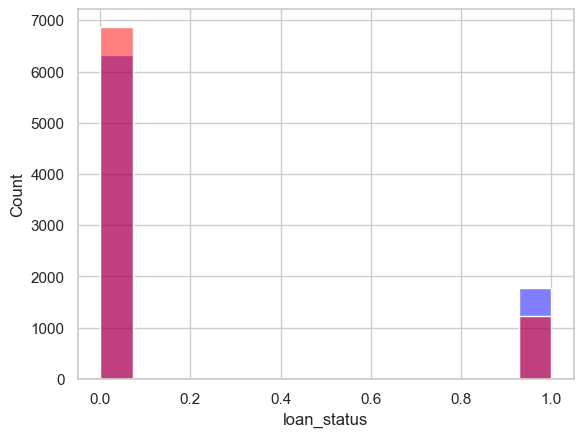

In [136]:
sns.histplot(Y_test, color='blue', alpha=0.5)
sns.histplot(Y_test_pred, color='red', alpha=0.5)

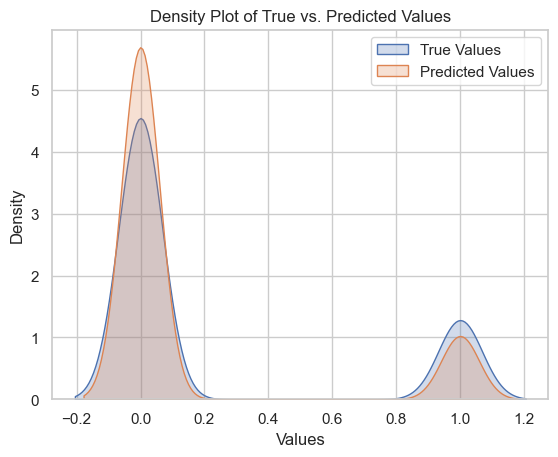

In [137]:
sns.kdeplot(Y_test, label='True Values', shade=True)
sns.kdeplot(Y_test_pred, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of True vs. Predicted Values')
plt.legend()
plt.show()

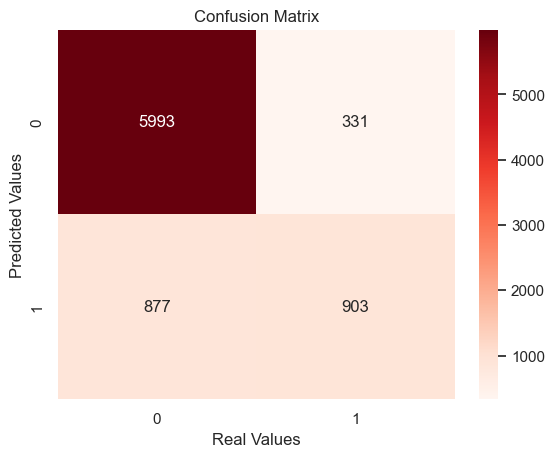

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

# KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN classifier
KNN = KNeighborsClassifier()  

# Fit the classifier to the training data
KNN.fit(X_train_transformed, Y_train)


KNeighborsClassifier()

In [140]:
# Make predictions on the test data
Y_test_pred = KNN.predict(X_test_transformed)

In [141]:
metrics.accuracy_score(Y_test,Y_test_pred)

0.8946199407699901

Text(0.5, 1.0, 'hist plot')

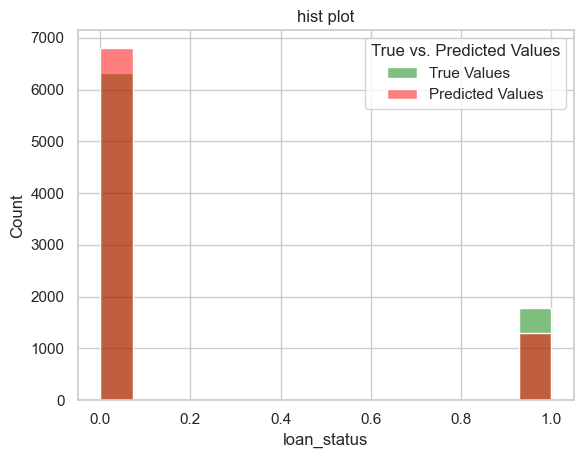

In [142]:
sns.histplot(Y_test,color='green',alpha=0.5)
sns.histplot(Y_test_pred,color='red',alpha=0.5)
plt.legend(title='True vs. Predicted Values', loc='upper right', labels=['True Values', 'Predicted Values'])
plt.title('hist plot')

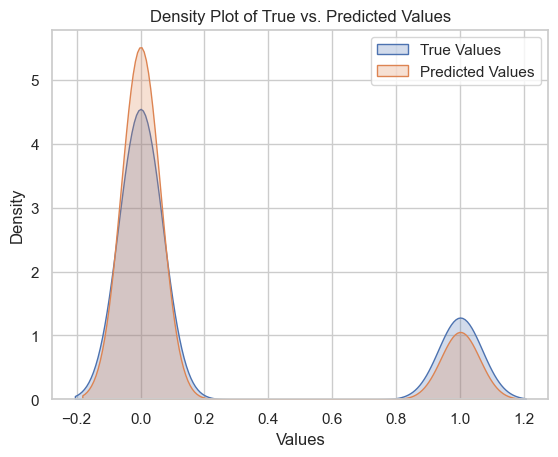

In [143]:
sns.kdeplot(Y_test, label='True Values', shade=True)
sns.kdeplot(Y_test_pred, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of True vs. Predicted Values')
plt.legend()
plt.show()

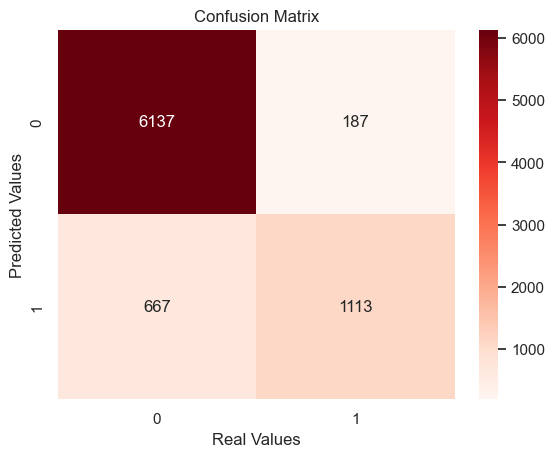

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

##  Support Vector Machines


In [145]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, Y_train)

SVC()

In [146]:
Y_test_pred = svc.predict(X_test_transformed)
metrics.accuracy_score(Y_test,Y_test_pred)

0.8963474827245804

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

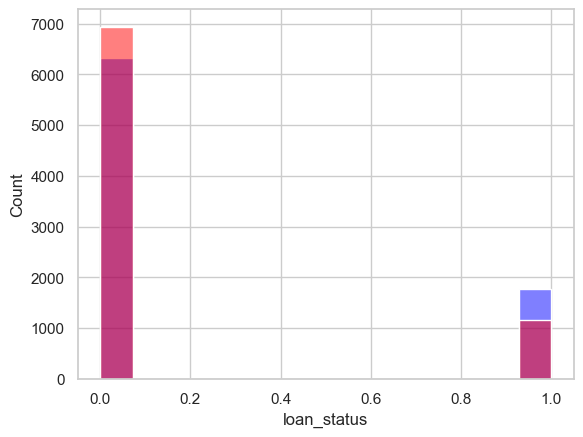

In [147]:
sns.histplot(Y_test, color='blue', alpha=0.5)
sns.histplot(Y_test_pred, color='red', alpha=0.5)

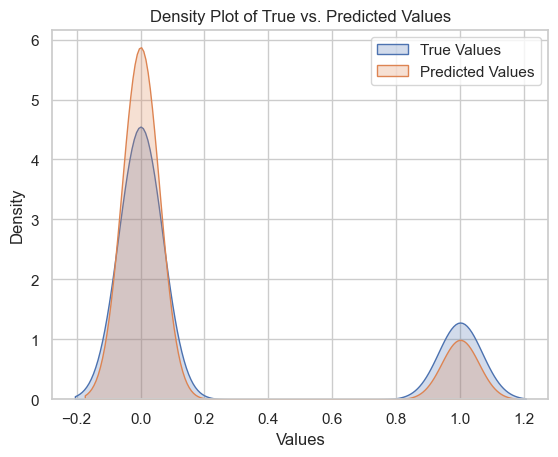

In [148]:
sns.kdeplot(Y_test, label='True Values', shade=True)
sns.kdeplot(Y_test_pred, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of True vs. Predicted Values')
plt.legend()
plt.show()

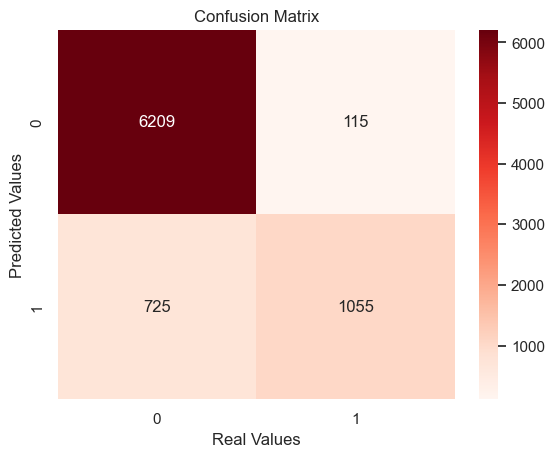

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

## RandomForestClassifier

In [150]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_transformed, Y_train)

RandomForestClassifier()

In [151]:
Y_test_pred = RF.predict(X_test_transformed)
metrics.accuracy_score(Y_test,Y_test_pred)

0.9334896347482725

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

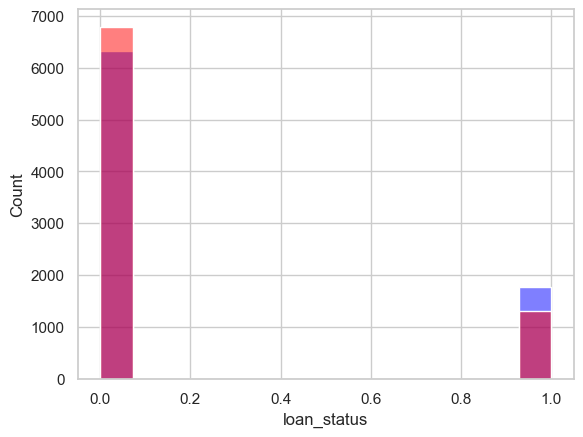

In [152]:
sns.histplot(Y_test, color='blue', alpha=0.5)
sns.histplot(Y_test_pred, color='red', alpha=0.5)

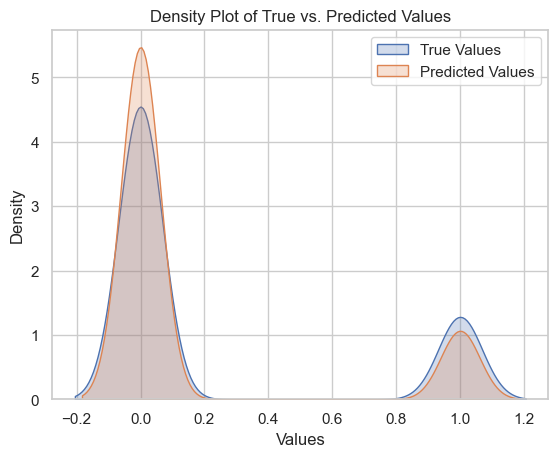

In [153]:
sns.kdeplot(Y_test, label='True Values', shade=True)
sns.kdeplot(Y_test_pred, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of True vs. Predicted Values')
plt.legend()
plt.show()

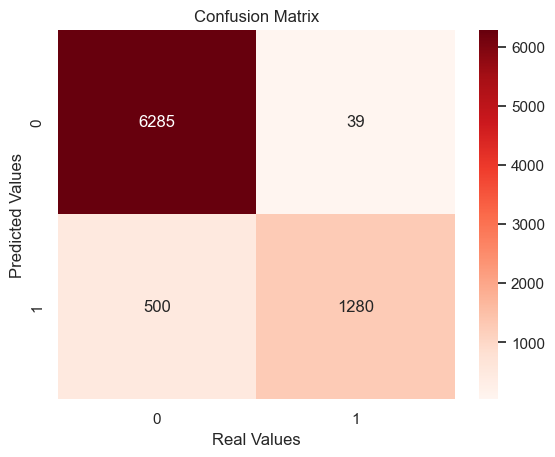

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [155]:
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier()
tree.fit(X_train_transformed,Y_train)

DecisionTreeClassifier()

In [156]:
Y_test_pred = tree.predict(X_test_transformed)
metrics.accuracy_score(Y_test,Y_test_pred)

0.8822803553800592

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

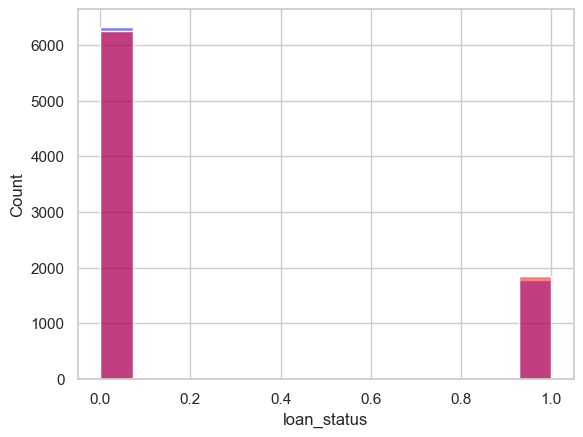

In [157]:
sns.histplot(Y_test, color='blue', alpha=0.5)
sns.histplot(Y_test_pred, color='red', alpha=0.5)

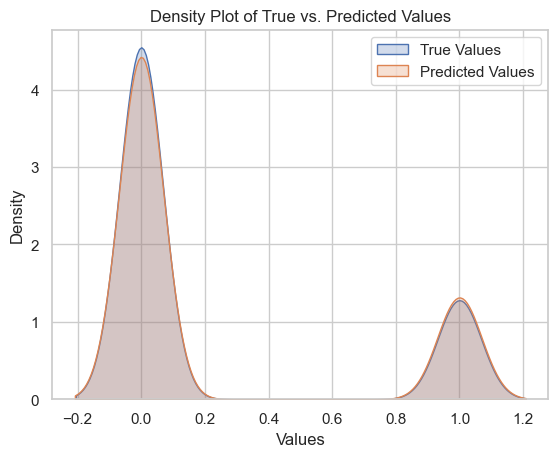

In [158]:
sns.kdeplot(Y_test, label='True Values', shade=True)
sns.kdeplot(Y_test_pred, label='Predicted Values', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of True vs. Predicted Values')
plt.legend()
plt.show()

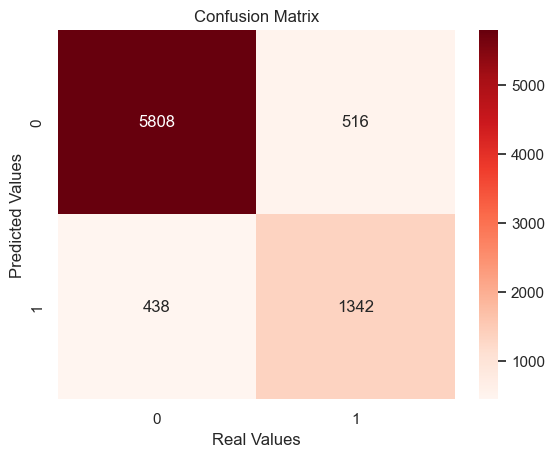

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

# MODEL COMPARISiON

In [163]:
accuracy_scores=[0.8509378084896347,0.8946199407699901,0.8963474827245804,0.9334896347482725,0.8822803553800592]

In [164]:
df = {'Logistic Regression':0.8509378084896347 ,'KNN Classifier':0.8946199407699901,'Support vector Classifier':0.8963474827245804,'Random Forest Classifier':0.9334896347482725,'Decision tree classifier':0.8822803553800592}

df1 = pd.DataFrame([df])
df1 = df1.transpose()
df1.columns = ['Accuracy']

print(df1)

                           Accuracy
Logistic Regression        0.850938
KNN Classifier             0.894620
Support vector Classifier  0.896347
Random Forest Classifier   0.933490
Decision tree classifier   0.882280


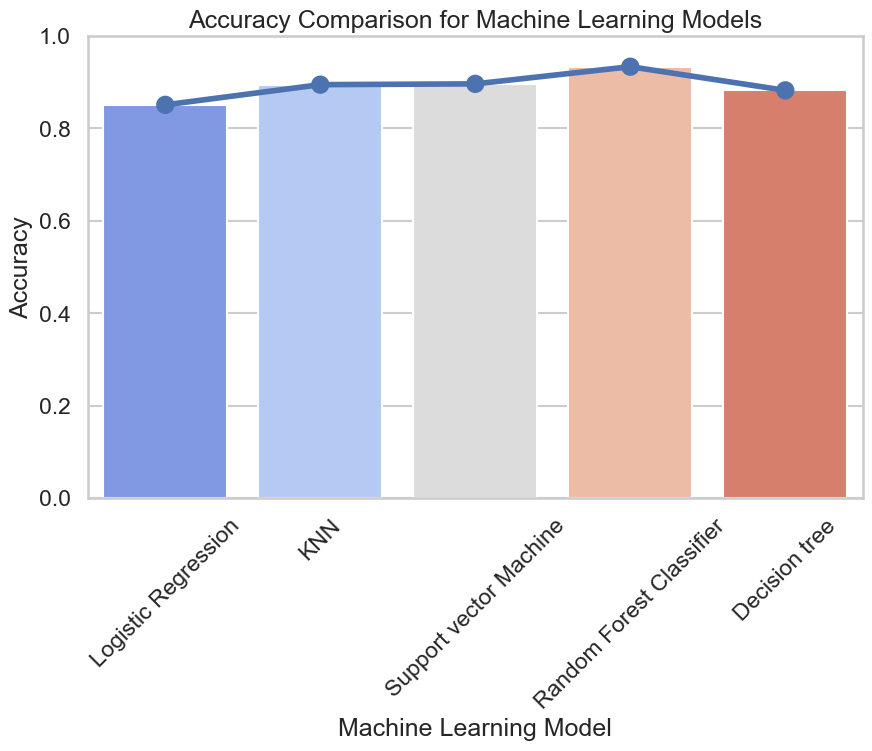

In [165]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10, 6))
sns.barplot(x=['Logistic Regression','KNN','Support vector Machine','Random Forest Classifier','Decision tree'], y=accuracy_scores,palette='coolwarm')
sns.pointplot(x=['Logistic Regression','KNN','Support vector Machine','Random Forest Classifier','Decision tree'], y=accuracy_scores)

plt.title("Accuracy Comparison for Machine Learning Models")
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## CONCLUSION

####  From above prediction "Random Forest Classifier" algorithm has good prediction compare to all other algorithm for Credit Risk Scoring.
